In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import and_, or_

from datetime import datetime

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [12]:
#SQL Alchemy to Pandas

# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from today
# max(date) is used instead of today() because the dataset's max date is over 365 days old, i.e. '2017-08-23' 
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

#SQL to Pandas
#prcp365 = pd.read_sql("select date, sum(prcp) as precip, count(*) as count from measurement where date >  (select date((select max(date) from measurement), '-365 day'))group by 1 order by 1 asc", engine)

sel = [Measurement.date,
      func.sum(Measurement.prcp),
      func.count(Measurement.date)]
dfP = pd.read_sql_query(session.query(*sel).\
    filter(Measurement.date > '2016-08-23').\
    group_by(Measurement.date).\
    order_by(Measurement.date).statement, session.bind)
#rename df columns
dfP = dfP.rename(columns={ dfP.columns[1]: "precip" })
dfP.head()


,date,precip,count_1
0,2016-08-24,9.33,7
1,2016-08-25,0.54,7
2,2016-08-26,0.10,6
3,2016-08-27,0.32,6
4,2016-08-28,3.10,6


<IPython.core.display.Javascript object>


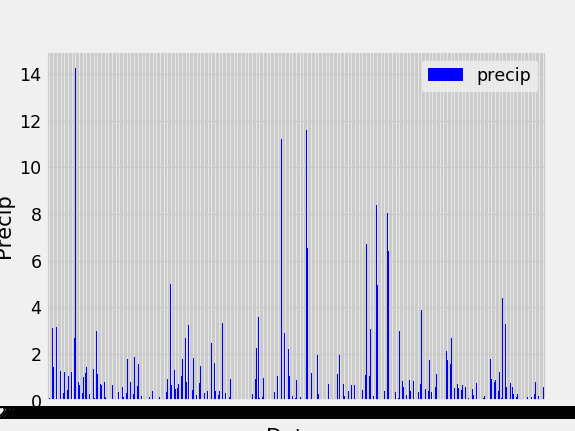

Text(0,0.5,'Precip')

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
# Rotate the xticks for the dates
dfP.plot(x='date', y='precip', kind='bar', rot=0, color="blue")
plt.xlabel("Dates")
plt.ylabel("Precip")

In [40]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sumStat = pd.DataFrame(dfP['precip'].describe())
sumStat

,precip
count,365.000000
mean,0.974164
std,1.776466
min,0.000000
25%,0.050000
50%,0.400000
75%,1.080000
max,14.280000


In [15]:
#Pull station data for most active stations
#SQL to Pandas
#stations = pd.read_sql("select station, count(*) as count from measurement group by 1 order by 2 desc", engine)

sel = [Measurement.station,
      func.count(Measurement.station)]
dfS = pd.read_sql_query(session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).statement, session.bind)
#rename df columns
dfS = dfS.rename(columns={ dfS.columns[1]: "count" })
dfS




,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [16]:
# How many stations are available in this dataset?
#from stations, the SQL to Pandas method
# stations['station'].count()

dfS['station'].nunique()

9

In [17]:
# What are the most active stations?
# List the stations and the counts in descending order.
dfS

,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [18]:
#Which station has the highest number of observations?
# 
# dfS.loc[dfS['count'].idxmax()]
# would be a look up but the df is sorted, so iloc[] is good

#extract numpy array
topS = dfS.values[0]

#extract value with index
station = topS[0]
print(station)


USC00519281


In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
#SQL to Pandas
#tempStat = pd.read_sql("select station, min(tobs), max(tobs), avg(tobs) from measurement where station = 'USC00519281'", engine)

#filter based on station variable extracted above

sel = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)] 
dfT = pd.read_sql_query(session.query(*sel).\
    filter(Measurement.station == station).statement, session.bind)
#rename df columns
dfT = dfT.rename(columns={ dfT.columns[1]: "minTemp", dfT.columns[2]: "maxTemp", dfT.columns[3]: "avgTemp" })
dfT



,station,minTemp,maxTemp,avgTemp
0,USC00519281,54.0,85.0,71.663781


<IPython.core.display.Javascript object>


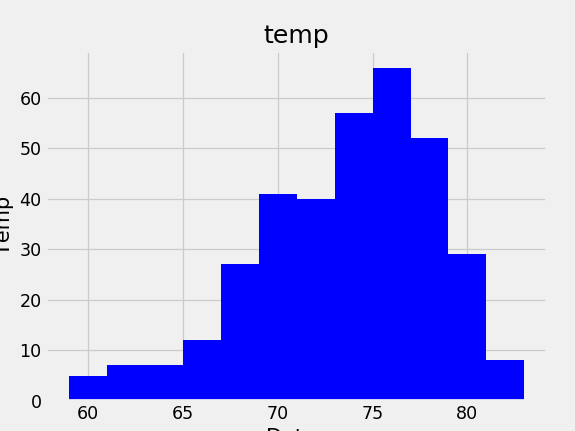

Text(0,0.5,'Temp')

In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#temp365 = pd.read_sql("select date, tobs from measurement where (date >  (select date((select max(date) from measurement), '-365 day')) AND station = 'USC00519281')order by 1 desc", engine)

sel = [Measurement.date,
       Measurement.tobs]
dfT365 = pd.read_sql_query(session.query(*sel).\
    filter(and_((Measurement.date > '2016-08-23'), (Measurement.station == station))).\
    order_by((Measurement.date).desc()).statement, session.bind)
#rename df columns
dfT365 = dfT365.rename(columns={ dfT365.columns[1]: "temp" })

#bin
dfT365.hist(column ='temp', bins = 12, color="blue")
plt.xlabel("Dates")
plt.ylabel("Temp")